<a href="https://colab.research.google.com/github/Makintosh24/Makintosh24/blob/main/Pythonclass_Lecture3_FIGDATA_Average_Temperature_in_EURope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
try:
  import opendatasets as opendatasets
except ImportError as e:
  !pip install opendatasets
  import opendatasets as od

In [42]:
od.download(https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities)

SyntaxError: invalid syntax (<ipython-input-42-8076f3783477>, line 1)

In [44]:
fn = "daily-temperature-of-major-cities/city_temperature.csv"
df = pd.read_csv(fn)

df.info(memory_usage="deep")




<ipython-input-44-f5cfa4ea3d53>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 767.7 MB


In [45]:
df[df.Region == "Europe"].City.unique()



array(['Tirana', 'Vienna', 'Minsk', 'Brussels', 'Sofia', 'Zagreb',
       'Nicosia', 'Prague', 'Copenhagen', 'Helsinki', 'Paris', 'Bordeaux',
       'Bonn', 'Frankfurt', 'Hamburg', 'Munich', 'Tbilisi', 'Athens',
       'Budapest', 'Reykjavik', 'Dublin', 'Milan', 'Rome', 'Riga',
       'Skopje', 'Amsterdam', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest',
       'Moscow', 'Yerevan', 'Pristina', 'Bratislava', 'Barcelona',
       'Bilbao', 'Madrid', 'Stockholm', 'Bern', 'Geneva', 'Zurich',
       'Kiev', 'Belfast', 'London', 'Belgrade'], dtype=object)

In [46]:
df= df [df.City == "Pristina"]

df= df [["Year", "Month", "Day", "AvgTemperature"]]
df= df[df['AvgTemperature']>-70]
df['AvgTemperature'] = (df['AvgTemperature']-32)*5/9 #transfering to celsius

df

,Year,Month,Day,AvgTemperature
890748,1995,1,1,6.388889
890749,1995,1,2,0.055556
890750,1995,1,3,-1.888889
890751,1995,1,4,-2.833333
890752,1995,1,5,-2.611111
...,...,...,...,...
894170,2004,5,15,11.833333
894171,2004,5,16,11.166667
894172,2004,5,17,11.055556
894173,2004,5,18,11.944444


In [47]:
df['Date']=pd.to_datetime(df[['Year', 'Month', 'Day']])
df=df.set_index(df['Date'])

df

,Year,Month,Day,AvgTemperature,Date
Date,,,,,
1995-01-01,1995,1,1,6.388889,1995-01-01
1995-01-02,1995,1,2,0.055556,1995-01-02
1995-01-03,1995,1,3,-1.888889,1995-01-03
1995-01-04,1995,1,4,-2.833333,1995-01-04
1995-01-05,1995,1,5,-2.611111,1995-01-05
...,...,...,...,...,...
2004-05-15,2004,5,15,11.833333,2004-05-15
2004-05-16,2004,5,16,11.166667,2004-05-16
2004-05-17,2004,5,17,11.055556,2004-05-17


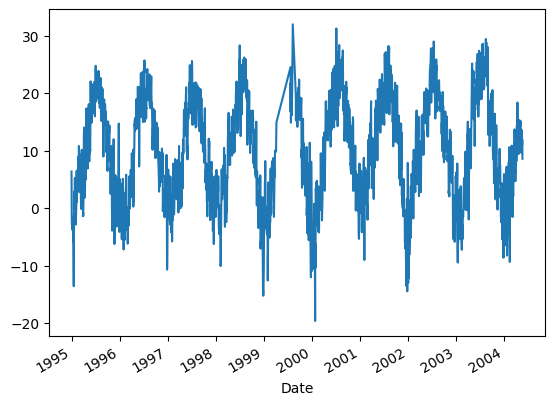

In [48]:
df["AvgTemperature"].plot()
plt.show()
